## Numbers of train images per label

This competition is **multi-label task**.  

So we should understand the number of train images per label.  

Let's check!!

In [64]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
pd.set_option("max_columns",300)
pd.set_option("max_rows",1020)

In [24]:
train_df = pd.read_csv("../input/train.csv")
labels_df = pd.read_csv("../input/labels.csv")

In [25]:
train_df["attribute_ids"]=train_df["attribute_ids"].apply(lambda x:[int(x) for x in x.split(" ")])
train_df["id"]=train_df["id"].apply(lambda x:x+".png")
train_df.head()

,id,attribute_ids
0,1000483014d91860.png,"[147, 616, 813]"
1,1000fe2e667721fe.png,"[51, 616, 734, 813]"
2,1001614cb89646ee.png,[776]
3,10041eb49b297c08.png,"[51, 671, 698, 813, 1092]"
4,100501c227f8beea.png,"[13, 404, 492, 903, 1093]"


In [27]:
for ix in tqdm(range(1103)):
    train_df["label_"+str(ix)] = train_df["attribute_ids"].map(lambda x: 1 if ix in x else 0)

100%|██████████| 1103/1103 [00:57<00:00, 19.10it/s]


In [28]:
train_df.head()

,id,attribute_ids,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9,label_10,label_11,label_12,label_13,label_14,label_15,label_16,label_17,label_18,label_19,label_20,label_21,label_22,label_23,label_24,label_25,label_26,label_27,label_28,label_29,label_30,label_31,label_32,label_33,label_34,label_35,label_36,label_37,...,label_1063,label_1064,label_1065,label_1066,label_1067,label_1068,label_1069,label_1070,label_1071,label_1072,label_1073,label_1074,label_1075,label_1076,label_1077,label_1078,label_1079,label_1080,label_1081,label_1082,label_1083,label_1084,label_1085,label_1086,label_1087,label_1088,label_1089,label_1090,label_1091,label_1092,label_1093,label_1094,label_1095,label_1096,label_1097,label_1098,label_1099,label_1100,label_1101,label_1102
0,1000483014d91860.png,"[147, 616, 813]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1000fe2e667721fe.png,"[51, 616, 734, 813]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1001614cb89646ee.png,[776],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10041eb49b297c08.png,"[51, 671, 698, 813, 1092]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,100501c227f8beea.png,"[13, 404, 492, 903, 1093]",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [82]:
labels = ["label_{}".format(i) for i in range(1103)]
summary = train_df[labels].sum()

In [83]:
labels_df["count"] = summary.values

In [86]:
labels_df.sort_values("count")

,attribute_id,attribute_name,count
199,199,culture::kholmogory,1
81,81,culture::chinese with european decoration,1
221,221,culture::macedonian,1
230,230,culture::mennecy or sceaux,1
366,366,culture::tsimshian,1
11,11,culture::algerian,1
104,104,culture::dehua,1
396,396,culture::zoroastrian,1
262,262,culture::nimes,1
805,805,tag::mark antony,1


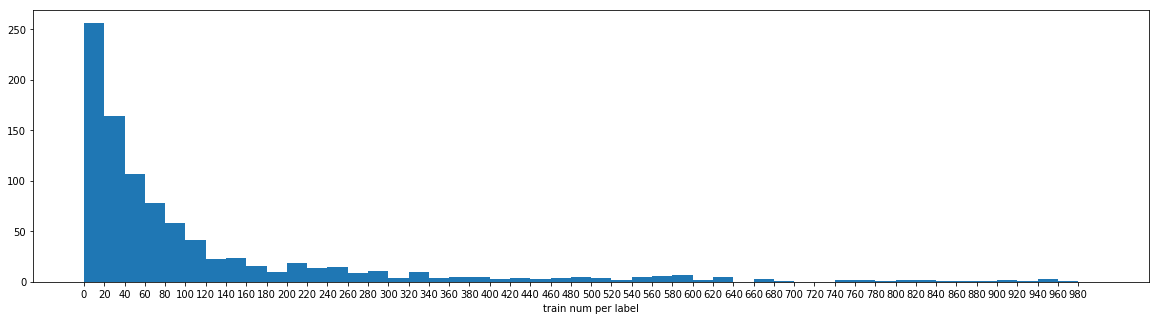

In [60]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([x for x in range(0,1000,20)]) 
plt.xlabel('train num per label')
plt.hist(summary, range=(0, 1000), bins=50);

In [69]:
for num in [5, 10, 50, 100]: 
    print("under {0}: {1}".format(num, (summary<=num).sum()))

under 5: 79
under 10: 167
under 50: 479
under 100: 664


How do we learn the labels which have less than 10 images?

## Summary

There are a lot of labels, and many labels have few images.

I think this competition's key is to treat these labels.